# Data analysis with Pandas
#### PyLadiesBcn / PyDay 2018



# 3. More about Pandas

In [282]:
import pandas as pd
import numpy as np


df_actividad = pd.read_csv("tarjetas.csv")

In [283]:
df_actividad.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_completa  \
0  RCG OFICINA                                 CONFECCION TEXTIL EN GENERAL   
1  MANZANIL AREA                   HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST   
2  REST REAL C GOLF SOTOGRAN                             RESTAURANTES RESTO   
3  ESTACONES DE SERVICIO ML                                     GASOLINERAS   
4  NISA (H 24) VINHOLAN  S.A.                                   GASOLINERAS   

     actividad  
0         ROPA  
1        HOTEL  
2  RESTAURANTE  
3        COCHE  
4        COCHE

### Duplicates

Extract people who spend money in a casino and which casino they were

In [64]:
df_casinos = df[df.actividad=='CASINO'][['nombre', 'actividad_completa']]

In [65]:
df_casinos.head()

nombre         actividad_completa
3354  Antonio Cámara Eguinoa  CAESAR'S HOTEL AND CASINO
3633  Antonio Cámara Eguinoa                    CASINOS
4884  Antonio Cámara Eguinoa                    CASINOS
5081  Antonio Cámara Eguinoa                    CASINOS
5082  Antonio Cámara Eguinoa                    CASINOS

Let's remove the duplications

In [66]:
df_casinos = df_casinos.drop_duplicates()

In [67]:
df_casinos

nombre         actividad_completa
3354                 Antonio Cámara Eguinoa  CAESAR'S HOTEL AND CASINO
3633                 Antonio Cámara Eguinoa                    CASINOS
12448          Rafael Eduardo Torres Posada                   APUESTAS
19593                Gonzalo Martín Pascual                 GAME GROUP
23886              Javier de Miguel Sánchez                 GAME GROUP
35068          José Ricardo Martínez Castro                 GAME GROUP
42105           Miguel Ángel Araujo Serrano           CASINO DE MADRID
43936           Miguel Ángel Araujo Serrano                 GAME GROUP
45385                   Pablo Abejas Juárez                    CASINOS
51579  Ricardo Romero de Tejada y Picatoste                   APUESTAS
60042     Maria Mercedes de la Merced Monge                   APUESTAS
60081     Maria Mercedes de la Merced Monge                       ONCE
60787     Maria Mercedes de la Merced Monge                    CASINOS
61054         Ildefonso José Sánchez Barcoj                    CASINOS
66450                      Matías Amat Roca                    CASINOS
74961                    Luis Gabarda Durán                    CASINOS
76353              Rodrigo de Rato Figaredo                    CASINOS

### Drop NA

Pandas have special attributes called isnull() and notnull()

In [68]:
df[df.comercio.isnull()]

nombre       fecha  hora  minuto      importe  \
30070  José Manuel Fernández Norniella  2011-12-27    15      53    22.959999   
30071  José Manuel Fernández Norniella  2011-12-27    15      53    19.980000   
30072  José Manuel Fernández Norniella  2011-12-27    15      53    19.980000   
30073  José Manuel Fernández Norniella  2011-12-28    16       1     7.990000   
30074  José Manuel Fernández Norniella  2011-12-29    15      37   102.480003   
30075  José Manuel Fernández Norniella  2012-01-05    15      36     0.790000   
30076  José Manuel Fernández Norniella  2012-01-13    16       1    88.470001   
30077  José Manuel Fernández Norniella  2012-01-13    16       1    88.470001   
30078  José Manuel Fernández Norniella  2012-01-13    16       1    88.470001   
46845              Pablo Abejas Juárez  2011-12-29    15      37     0.990000   
64022          Ricardo Morado Iglesias  2010-12-01    12      52  2500.000000   

      comercio                            actividad_completa         actividad  
30070      NaN                        INSTRUMENTOS MUSICALES     COMPRA BIENES  
30071      NaN                        INSTRUMENTOS MUSICALES     COMPRA BIENES  
30072      NaN                        INSTRUMENTOS MUSICALES     COMPRA BIENES  
30073      NaN                        INSTRUMENTOS MUSICALES     COMPRA BIENES  
30074      NaN                                     HELADERIA       RESTAURANTE  
30075      NaN       DIRECT MARKETING CONTINUITY/SUBCRIPCION  DIRECT MARKETING  
30076      NaN  MISCELLANEOUS APPAREL &amp; ACCESSORY STORES     COMPRA BIENES  
30077      NaN  MISCELLANEOUS APPAREL &amp; ACCESSORY STORES     COMPRA BIENES  
30078      NaN  MISCELLANEOUS APPAREL &amp; ACCESSORY STORES     COMPRA BIENES  
46845      NaN                        INSTRUMENTOS MUSICALES     COMPRA BIENES  
64022      NaN       AGENCIAS BANCARIAS(ANTICIPO VENTANILLA)             BANCO

But you can also get rid of it quickly with dropna

In [69]:
len(df)

77202

In [70]:
df_drop_na_comercio = df.dropna(subset=['comercio'])

In [71]:
len(df_drop_na_comercio)

77191

### Unique values

In [72]:
df[df.actividad=='CASINO'].nombre.unique()

array(['Antonio Cámara Eguinoa', 'Rafael Eduardo Torres Posada',
       'Gonzalo Martín Pascual', 'Javier de Miguel Sánchez',
       'José Ricardo Martínez Castro', 'Miguel Ángel Araujo Serrano',
       'Pablo Abejas Juárez', 'Ricardo Romero de Tejada y Picatoste',
       'Maria Mercedes de la Merced Monge',
       'Ildefonso José Sánchez Barcoj', 'Matías Amat Roca',
       'Luis Gabarda Durán', 'Rodrigo de Rato Figaredo'], dtype=object)

### String operations

In [73]:
df.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_completa  \
0  RCG OFICINA                                 CONFECCION TEXTIL EN GENERAL   
1  MANZANIL AREA                   HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST   
2  REST REAL C GOLF SOTOGRAN                             RESTAURANTES RESTO   
3  ESTACONES DE SERVICIO ML                                     GASOLINERAS   
4  NISA (H 24) VINHOLAN  S.A.                                   GASOLINERAS   

     actividad  
0         ROPA  
1        HOTEL  
2  RESTAURANTE  
3        COCHE  
4        COCHE

In [74]:
df['actividad_completa'] = df.actividad_completa.str.lower()

In [75]:
df.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_completa  \
0  RCG OFICINA                                 confeccion textil en general   
1  MANZANIL AREA                   hoteles,moteles,balnearios,campings rest   
2  REST REAL C GOLF SOTOGRAN                             restaurantes resto   
3  ESTACONES DE SERVICIO ML                                     gasolineras   
4  NISA (H 24) VINHOLAN  S.A.                                   gasolineras   

     actividad  
0         ROPA  
1        HOTEL  
2  RESTAURANTE  
3        COCHE  
4        COCHE

### Numerical operations

In [76]:
df[df.actividad=='CASINO'].importe.mean()

136.06657465516705

In [77]:
%matplotlib inline

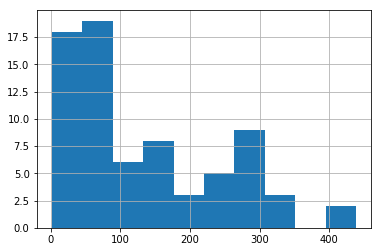

In [78]:
df[df.actividad=='CASINO'].importe.hist()

### Groupby

How many activities each person spent money with?

In [79]:
df.groupby('nombre').actividad.count()

nombre
Alberto Recarte García Andrade            1357
Alejandro Couceiro Ojeda                   549
Angel Rizaldos González                    120
Antonio Cámara Eguinoa                    3358
Antonio Rey de Viñas Sánchez-Majestad     1822
Antonio Romero Lázaro                     2103
Arturo Luis Fernández Álvarez              134
Beltrán Gutiérrez Moliner                  425
Carlos María Martínez Martínez            1197
Carlos Vela García                         803
Carmen Contreras Gómez                    1061
Cándido Cerón Escudero                     578
Domingo Navalmoral Sánchez                 137
Enrique de la Torre Martínez               385
Estanislao Rodríguez-Ponga Salamanca      1414
Fernando Serrano Antón                     637
Francisco Baquero Noriega                 1100
Francisco Javier López Madrid              111
Francisco José Moure Bourio                894
Francisco José Pérez Fernández            1195
Gabriel María Moreno Flores                318
Gerard

In [80]:
df.groupby(['nombre','actividad']).actividad.count()

nombre                                  actividad         
Alberto Recarte García Andrade          AVION                  60
                                        BANCO                   1
                                        BUSINESS                1
                                        COCHE                 367
                                        COMPRA BIENES         114
                                        DEPORTE                20
                                        DIRECT MARKETING       15
                                        DUTYFREE                1
                                        HOGAR                   1
                                        HOTEL                 189
                                        LIBRERIA               65
                                        MISC                   27
                                        REGALOS                 1
                                        RESTAURANTE           436
                 

In [81]:
df[(df.nombre=='Alberto Recarte García Andrade') & (df.actividad=='SUPERMERCADO')]

nombre       fecha  hora  minuto     importe  \
152   Alberto Recarte García Andrade  2003-12-09     9      51  759.919983   
352   Alberto Recarte García Andrade  2005-06-19    19      42   11.400000   
529   Alberto Recarte García Andrade  2006-10-10    16      46   88.610001   
560   Alberto Recarte García Andrade  2006-12-24    13      10  217.380005   
577   Alberto Recarte García Andrade  2007-01-20    18      25   31.250000   
804   Alberto Recarte García Andrade  2007-12-24    19      52  259.019989   
1078  Alberto Recarte García Andrade  2009-01-11    22      45   63.270000   

                            comercio                      actividad_completa  \
152   NEW PALACIO DE LOS LICORES      supermercados,ultramarinos, economatos   
352   EMBASSY  S A                    supermercados,ultramarinos, economatos   
529   SEMON                           supermercados,ultramarinos, economatos   
560   PASTELERIAS MALLORCA (KE)       supermercados,ultramarinos, economatos   
577   PASTELERIAS MALLORCA (KE)       supermercados,ultramarinos, economatos   
804   PASTELERIAS MALLORCA (KE)       hipermercados (tecnologia electronica)   
1078  MALLORCA                        hipermercados (tecnologia electronica)   

         actividad  
152   SUPERMERCADO  
352   SUPERMERCADO  
529   SUPERMERCADO  
560   SUPERMERCADO  
577   SUPERMERCADO  
804   SUPERMERCADO  
1078  SUPERMERCADO

Let's do a new DataFrame with a summary of information:

In [82]:
df_summary = pd.DataFrame(df.groupby('nombre').actividad.count())

In [83]:
df_summary.head()

actividad
nombre                                          
Alberto Recarte García Andrade              1357
Alejandro Couceiro Ojeda                     549
Angel Rizaldos González                      120
Antonio Cámara Eguinoa                      3358
Antonio Rey de Viñas Sánchez-Majestad       1822

In [84]:
df_summary['importe_media'] = df.groupby('nombre').importe.mean()
df_summary['importe_max'] = df.groupby('nombre').importe.max()
df_summary['importe_min'] = df.groupby('nombre').importe.min()
df_summary['importe_total'] = df.groupby('nombre').importe.sum()

In [85]:
df_summary.head()

actividad  importe_media  importe_max  \
nombre                                                                         
Alberto Recarte García Andrade              1357     100.592498  3509.199951   
Alejandro Couceiro Ojeda                     549     124.762277  1150.000000   
Angel Rizaldos González                      120     168.135918   843.000000   
Antonio Cámara Eguinoa                      3358      52.461551  2742.000000   
Antonio Rey de Viñas Sánchez-Majestad       1822     103.598222  1751.079956   

                                       importe_min  importe_total  
nombre                                                             
Alberto Recarte García Andrade         -401.250000  136504.019797  
Alejandro Couceiro Ojeda               -100.800003   68494.490011  
Angel Rizaldos González                  24.450001   20176.310112  
Antonio Cámara Eguinoa                 -328.420013  176165.889852  
Antonio Rey de Viñas Sánchez-Majestad  -241.490005  188755.959932

### reset_index()

For DataFrame with multi-level index, return new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc. if any are None. For a standard index, the index name will be used (if set), otherwise a default ‘index’ or ‘level_0’ (if ‘index’ is already taken) will be used.

In [86]:
df_summary = df_summary.reset_index()

In [87]:
df_summary = df_summary.sort_values('importe_total',ascending=False)

In [88]:
df_summary.head()

nombre  actividad  importe_media   importe_max  \
27  Ildefonso José Sánchez Barcoj       2737     208.598979  16921.759766   
34      José Antonio Moral Santín       1215     368.534757   1000.000000   
75        Ricardo Morado Iglesias        265    1675.468641   6800.000000   
58               Matías Amat Roca       1036     414.355366  15000.000000   
60       Miguel Blesa de la Parra       1565     270.331303  13148.299805   

    importe_min  importe_total  
27 -9784.730469  572187.000182  
34     1.200000  447769.729996  
75  -304.000000  443999.189930  
58 -7287.740234  429272.159650  
60 -2000.000000  423068.489459

Ok... wow... how much did they spent??

## Exercises

1. Which casinos were used?

In [89]:
%timeit df.loc[df['actividad'] == "CASINO",'comercio'].drop_duplicates()
%timeit df.loc[df.actividad == "CASINO",'comercio'].drop_duplicates()


6.84 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.72 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2. Which person spent more money in total? How much was it?

In [255]:
df.groupby('nombre').importe.sum().sort_values(ascending=False)

nombre
Ildefonso José Sánchez Barcoj             572187.000182
José Antonio Moral Santín                 447769.729996
Ricardo Morado Iglesias                   443999.189930
Matías Amat Roca                          429272.159650
Miguel Blesa de la Parra                  423068.489459
Ramón Ferraz Ricarte                      389450.349650
Mariano Pérez Claver                      354171.000311
Enrique de la Torre Martínez              304818.360048
Juan Manuel Astorqui Portera              287121.199686
Maria Mercedes de la Merced Monge         284404.420339
Carmen Contreras Gómez                    277204.309599
Carlos María Martínez Martínez            271900.700205
Francisco Baquero Noriega                 261817.279617
Estanislao Rodríguez-Ponga Salamanca      253961.800249
Antonio Romero Lázaro                     246857.290031
Carlos Vela García                        246248.549981
Pablo Abejas Juárez                       245524.799889
Rafael Spottorno Díaz Caro               

In [91]:
df.groupby('nombre').importe.sum().sort_values(ascending=False).keys()[0]

'Ildefonso José Sánchez Barcoj'

3. In which activity he spent the maximum import? Which was this import?

In [92]:
df[df['nombre'] == 'Ildefonso José Sánchez Barcoj'].groupby(by='actividad').importe.max().sort_values(ascending=False).keys()[0]

'COMPRA BIENES'

4. Which was the annual median of money spent per person?

In [95]:
df.groupby(['fecha','nombre']).importe.median()

fecha       nombre                               
2003-01-01  Antonio Rey de Viñas Sánchez-Majestad     134.490005
            Carlos María Martínez Martínez            376.000000
            Carlos Vela García                        165.650000
            Francisco José Moure Bourio                22.700001
            Ignacio de Navasques Cobián                42.000000
            Ignacio del Río García de Sola             50.000000
            José Acosta Cubero                         94.779999
            José Nieto Antolinos                       39.299999
            Miguel Blesa de la Parra                   64.250000
            Pedro Bugidos Garay                        49.980001
            Rafael Darío Fernández Yruegas Moro        60.970001
            Ramón Ferraz Ricarte                       58.000000
            Ricardo Romero de Tejada y Picatoste       39.130001
            Rubén Cruz Orive                          110.000000
2003-01-02  Alejandro Couceiro Ojeda    

## Setting data

### Rename a column

In [108]:
df.rename(columns={'actividad_completa':'actividad_detalles'},inplace=True)

In [109]:
df.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_detalles  \
0  RCG OFICINA                                 confeccion textil en general   
1  MANZANIL AREA                   hoteles,moteles,balnearios,campings rest   
2  REST REAL C GOLF SOTOGRAN                             restaurantes resto   
3  ESTACONES DE SERVICIO ML                                     gasolineras   
4  NISA (H 24) VINHOLAN  S.A.                                   gasolineras   

     actividad  importe_dolar  
0         ROPA      44.118001  
1        HOTEL      16.644000  
2  RESTAURANTE     109.006803  
3        COCHE      56.008201  
4        COCHE      15.891600

Copy the dataframe and change the name of all columns

In [114]:
df_english = df.copy()

In [116]:
df_english.columns = ['name','date','hour','minute','import','business','activity_full','activity', 'USD$']

In [117]:
df_english.head()

name        date  hour  minute     import  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         business                             activity_full  \
0  RCG OFICINA                                 confeccion textil en general   
1  MANZANIL AREA                   hoteles,moteles,balnearios,campings rest   
2  REST REAL C GOLF SOTOGRAN                             restaurantes resto   
3  ESTACONES DE SERVICIO ML                                     gasolineras   
4  NISA (H 24) VINHOLAN  S.A.                                   gasolineras   

      activity        USD$  
0         ROPA   44.118001  
1        HOTEL   16.644000  
2  RESTAURANTE  109.006803  
3        COCHE   56.008201  
4        COCHE   15.891600

### Operate over columns

Let's convert the import from euros to dolars with the rate conversion 1€ = 1.14$

In [118]:
df["importe_dolar"] = df["importe"]*1.14

In [119]:
df.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_detalles  \
0  RCG OFICINA                                 confeccion textil en general   
1  MANZANIL AREA                   hoteles,moteles,balnearios,campings rest   
2  REST REAL C GOLF SOTOGRAN                             restaurantes resto   
3  ESTACONES DE SERVICIO ML                                     gasolineras   
4  NISA (H 24) VINHOLAN  S.A.                                   gasolineras   

     actividad  importe_dolar  
0         ROPA      44.118001  
1        HOTEL      16.644000  
2  RESTAURANTE     109.006803  
3        COCHE      56.008201  
4        COCHE      15.891600

In [120]:
total_money = df_summary.importe_total.sum()

In [121]:
df_summary["porcentaje"] = (df_summary.importe_total / total_money)*100

In [122]:
df_summary.head()

nombre  actividad  importe_media   importe_max  \
27  Ildefonso José Sánchez Barcoj       2737     208.598979  16921.759766   
34      José Antonio Moral Santín       1215     368.534757   1000.000000   
75        Ricardo Morado Iglesias        265    1675.468641   6800.000000   
58               Matías Amat Roca       1036     414.355366  15000.000000   
60       Miguel Blesa de la Parra       1565     270.331303  13148.299805   

    importe_min  importe_total  porcentaje  
27 -9784.730469  572187.000182    4.846261  
34     1.200000  447769.729996    3.792482  
75  -304.000000  443999.189930    3.760547  
58 -7287.740234  429272.159650    3.635813  
60 -2000.000000  423068.489459    3.583270

### Operate over specific rows

In [123]:
df.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04    12      30  38.700001   
1  Alberto Recarte García Andrade  2003-01-04    12      32  14.600000   
2  Alberto Recarte García Andrade  2003-01-05    19       7  95.620003   
3  Alberto Recarte García Andrade  2003-01-08    15      31  49.130001   
4  Alberto Recarte García Andrade  2003-01-08    16       5  13.940000   

                         comercio                        actividad_detalles  \
0  RCG OFICINA                                 confeccion textil en general   
1  MANZANIL AREA                   hoteles,moteles,balnearios,campings rest   
2  REST REAL C GOLF SOTOGRAN                             restaurantes resto   
3  ESTACONES DE SERVICIO ML                                     gasolineras   
4  NISA (H 24) VINHOLAN  S.A.                                   gasolineras   

     actividad  importe_dolar  
0         ROPA      44.118001  
1        HOTEL      16.644000  
2  RESTAURANTE     109.006803  
3        COCHE      56.008201  
4        COCHE      15.891600

In [129]:
df[df.actividad_detalles.notnull() & df.actividad_detalles.str.contains('&amp;')].actividad_detalles[:5]

66      direct marketing-combination catalog&amp;ret
212     direct marketing-combination catalog&amp;ret
213     direct marketing-combination catalog&amp;ret
1923              men's &amp; ladies clothing stores
2365    antique shops-sales, repairs &amp; restorati
Name: actividad_detalles, dtype: object

In [130]:
df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))].actividad_detalles[:5]

66      direct marketing-combination catalog&amp;ret
212     direct marketing-combination catalog&amp;ret
213     direct marketing-combination catalog&amp;ret
1923              men's &amp; ladies clothing stores
2365    antique shops-sales, repairs &amp; restorati
Name: actividad_detalles, dtype: object

In [132]:
df.loc[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;')), 'actividad_detalles'] = df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))].actividad_detalles.str.replace('&amp;','&')

In [133]:
df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))]

Empty DataFrame
Columns: [nombre, fecha, hora, minuto, importe, comercio, actividad_detalles, actividad, importe_dolar]
Index: []

### Apply

In [134]:
def discretize_import(importe):
    importe = abs(importe)
    if importe <= 10:
        return 'LOW'
    elif 10 < importe <= 100:
        return 'MEDIUM'
    elif 100 <= importe < 1000:
        return 'HIGH'
    else:
        return 'SUPER-HIGH'

In [136]:
df['importe_discretizado'] = df.importe.apply(lambda x: discretize_import(x))

## Exercises

1. Check if what the press said is true

![image.png](attachment:image.png)

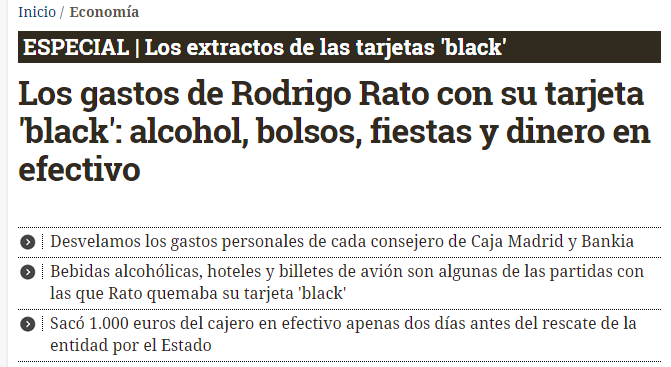

In [148]:
df[df.nombre.str.contains('Rato')& df.actividad_detalles.str.contains('fiesta')]

nombre       fecha  hora  minuto     importe  \
76649  Rodrigo de Rato Figaredo  2011-02-23    15      37  463.200012   
76650  Rodrigo de Rato Figaredo  2011-02-24    15      29  464.829987   
76651  Rodrigo de Rato Figaredo  2011-02-25    15      32  461.390015   
76652  Rodrigo de Rato Figaredo  2011-02-26    14       4  459.809998   
76655  Rodrigo de Rato Figaredo  2011-02-27    14       2  322.980011   

                             comercio  \
76649                                   
76650                                   
76651                                   
76652                                   
76655                                   

                             actividad_detalles actividad  importe_dolar  \
76649  clubs,salas fiesta,pubs,discotecas,bares   SALIDAS     528.048014   
76650  clubs,salas fiesta,pubs,discotecas,bares   SALIDAS     529.906185   
76651  clubs,salas fiesta,pubs,discotecas,bares   SALIDAS     525.984617   
76652  clubs,salas fiesta,pubs,discotecas,bares   SALIDAS     524.183397   
76655  clubs,salas fiesta,pubs,discotecas,bares   SALIDAS     368.197213   

      importe_discretizado  
76649                 HIGH  
76650                 HIGH  
76651                 HIGH  
76652                 HIGH  
76655                 HIGH

In [253]:
df[df.nombre.str.contains('Rato')].groupby(['actividad']).importe.sum().sort_values(ascending=False)

actividad
RESTAURANTE           17613.579961
CA$H                  17300.000000
AVION                 10669.519939
HOTEL                  9173.989979
ROPA                   7478.590004
COMPRA BIENES          7237.800023
COCHE                  4628.999983
HOGAR                  4053.070026
BEBIDAS                3820.389938
SALIDAS                3187.350025
SALUD                  2663.790000
REGALOS                2439.000000
VIAJE                  2086.679932
COMPRA BIENES LUJO     1584.120003
SUPERMERCADO           1456.739996
TREN                    975.049988
DIRECT MARKETING        749.910011
ESTETICA                559.750000
LIBRERIA                522.969991
DUTYFREE                234.570007
SOCIAL                  199.240000
MISC                    170.950000
DEPORTE                 132.949999
CASINO                   69.500000
BUSINESS                 32.580000
BANCO                     0.000000
Name: importe, dtype: float64

In [150]:
df[df.nombre.str.contains('Rato')].groupby(['actividad', 'actividad_detalles']).importe.sum().sort_values(ascending=False)

actividad           actividad_detalles                      
CA$H                cajeros automaticos                         17300.000000
RESTAURANTE         restaurantes resto                          14801.299992
HOTEL               hoteles 4 y 5 estrellas,balnearios,campi     5825.309986
BEBIDAS             venta bebidas alcoholicas                    3820.389938
ROPA                confeccion textil en general                 2456.820000
REGALOS             bazares, objetos regalo y souvenirs          2439.000000
AVION               air europa                                   2386.829956
SALIDAS             clubs,salas fiesta,pubs,discotecas,bares     2172.210022
SALUD               farmacias                                    2098.929999
HOGAR               ferreteria,bricolaje,menaje del hogar        2091.890045
VIAJE               agencias de viajes                           2086.679932
AVION               iberia                                       2034.589962
HOTEL          

2. Do you believe the quote from this [newspaper article](https://www.europapress.es/nacional/noticia-gastos-rato-blesa-tarjetas-vistazo-20141010175452.html)? 

"Los apuntes incluidos en la documentación incluyen gastos como varios miles de euros en vino en el establecimiento Lavinia España Selección, durante la Navidad y otras ocasiones, de Miguel Blesa; o 1.849,23 euros en 'clubs, salas de fiestas, pubs, discotecas y bares' cuatro días seguidos, de Rodrigo Rato."  

In [169]:
#df[df.nombre.str.contains('Rato')& df.actividad_detalles.str.contains('fiesta')]
df[df.nombre.str.contains('Blesa')& df.comercio.str.contains('LAVINIA ESPANA SELECCION S.L.')].importe.sum()

21257.269920349125

3. Who spent money on McDonald's?

In [231]:
#df_drop_na_actdetalles = df.dropna(subset=['actividad_detalles'])
#df_drop_na_actdetalles
#df_drop_na_actdetalles[df_drop_na_actdetalles.actividad_detalles.str.contains('rapida')]
df_drop_na_comercio.loc[df_drop_na_comercio.comercio.str.contains('MC DONALDS')]

nombre       fecha  hora  minuto  importe  \
18181  Gabriel María Moreno Flores  2010-12-13    23      46    16.65   
44335  Miguel Ángel Araujo Serrano  2011-03-06    14       5    13.05   
44336  Miguel Ángel Araujo Serrano  2011-03-06    16       5     9.65   
44502  Miguel Ángel Araujo Serrano  2011-08-19    15      32    20.50   

                             comercio  actividad_completa    actividad  
18181  MC DONALDS PLAZA DE CASTILLA         COMIDA RAPIDA  RESTAURANTE  
44335  MC DONALDS                      RESTAURANTES RESTO  RESTAURANTE  
44336  MC DONALDS                      RESTAURANTES RESTO  RESTAURANTE  
44502  MC DONALDS                      RESTAURANTES RESTO  RESTAURANTE

## Join

### Concat

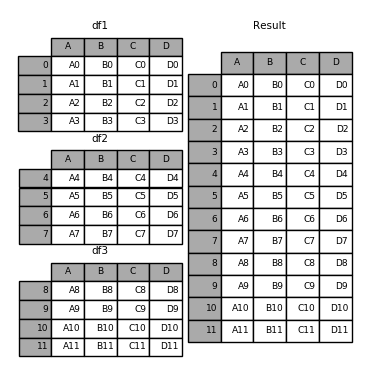

In [232]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                   'B': ['B8', 'B9', 'B10', 'B11'],
                   'C': ['C8', 'C9', 'C10', 'C11'],
                   'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [233]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [234]:
df2

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [235]:
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [236]:
pd.concat([df1, df2, df3])

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [249]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

In [250]:
pd.concat([df1, df4], axis=1, sort=False)

A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

In [243]:
pd.concat([df1, df4], axis=1, join='inner')

A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3

### Merge

```python
pd.merge(left, right, 
        how='inner', 
        on=None, 
        left_on=None, 
        right_on=None,
        left_index=False, 
        right_index=False```

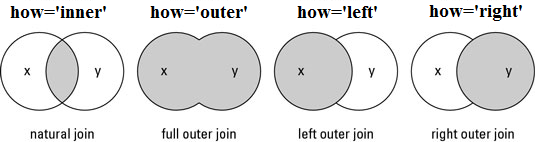

In [246]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [247]:
pd.merge(left, right, on=['key1', 'key2'])

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [248]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

In [251]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3

In [252]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3

## Exercises

We have download the 'cargos_targetas_black.xlsx dataset from el [periodico](https://www.elperiodico.com/es/graficos/economia/imputados-tarjetas-black-caja-madrid-8550/). Please add it to the main dataframe and calculate how much money was spent by members or the same political party / labour union?

In [284]:
df_cargos = pd.read_excel("cargos_tarjetas_black.xlsx")

In [268]:
df.head()

nombre  \
0  Alberto Recarte García Andrade   
1        Alejandro Couceiro Ojeda   
2  Ángel Gómez del Pulgar Perales   
3         Ángel Rizaldos González   
4          Antonio Cámara Eguinoa   

                                               cargo partido / sindicato  \
0                         Exconsejero de Caja Madrid                  PP   
1                         Exconsejero de Caja Madrid                CEIM   
2                         Exconsejero de Caja Madrid                PSOE   
3  Exmiembro de la asamblea de Caja Madrid y mili...                  IU   
4                         Exconsejero de Caja Madrid                  PP   

   dinero obtenido  media anual  
0           139900        17500  
1            70200        17500  
2           149700        18700  
3            20100         5000  
4           178000        23300

In [286]:
df_complete = pd.merge(df_actividad,df_cargos, how='outer', on=['nombre'])

In [287]:
df_complete.head()

nombre       fecha  hora  minuto    importe  \
0  Alberto Recarte García Andrade  2003-01-04  12.0    30.0  38.700001   
1  Alberto Recarte García Andrade  2003-01-04  12.0    32.0  14.600000   
2  Alberto Recarte García Andrade  2003-01-05  19.0     7.0  95.620003   
3  Alberto Recarte García Andrade  2003-01-08  15.0    31.0  49.130001   
4  Alberto Recarte García Andrade  2003-01-08  16.0     5.0  13.940000   

                         comercio                        actividad_completa  \
0  RCG OFICINA                                 CONFECCION TEXTIL EN GENERAL   
1  MANZANIL AREA                   HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST   
2  REST REAL C GOLF SOTOGRAN                             RESTAURANTES RESTO   
3  ESTACONES DE SERVICIO ML                                     GASOLINERAS   
4  NISA (H 24) VINHOLAN  S.A.                                   GASOLINERAS   

     actividad                       cargo partido / sindicato  \
0         ROPA  Exconsejero de Caja Madrid                  PP   
1        HOTEL  Exconsejero de Caja Madrid                  PP   
2  RESTAURANTE  Exconsejero de Caja Madrid                  PP   
3        COCHE  Exconsejero de Caja Madrid                  PP   
4        COCHE  Exconsejero de Caja Madrid                  PP   

   dinero obtenido  media anual  
0         139900.0      17500.0  
1         139900.0      17500.0  
2         139900.0      17500.0  
3         139900.0      17500.0  
4         139900.0      17500.0

In [301]:
df_complete.rename(columns={'dinero obtenido':'dinero_obtenido'},inplace=True)

In [331]:
df_complete[['nombre','partido / sindicato','dinero_obtenido','importe']].groupby(['partido / sindicato']).sum()

dinero_obtenido       importe
partido / sindicato                               
---                     1.775725e+09  2.386745e+06
CCOO                    6.395444e+08  5.749604e+05
CEIM                    4.240260e+07  1.033023e+05
CEOE                    9.400000e+04  0.000000e+00
IU                      1.461400e+09  8.033918e+05
PP                      2.538399e+09  1.667669e+06
PSOE                    1.625602e+09  9.778083e+05
UGT                     3.235222e+08  2.789321e+05

In [307]:
df_complete.groupby(['partido / sindicato']).importe.sum()

partido / sindicato
---     2.386745e+06
CCOO    5.749604e+05
CEIM    1.033023e+05
CEOE    0.000000e+00
IU      8.033918e+05
PP      1.667669e+06
PSOE    9.778083e+05
UGT     2.789321e+05
Name: importe, dtype: float64

In [302]:
list(df_complete)

['nombre',
 'fecha',
 'hora',
 'minuto',
 'importe',
 'comercio',
 'actividad_completa',
 'actividad',
 'cargo',
 'partido / sindicato',
 'dinero_obtenido',
 'media anual']

In [310]:
df_complete[df_complete['partido / sindicato'] == 'CEOE']

nombre fecha  hora  minuto  importe comercio  \
77211  Gerardo Díaz Ferran   NaN   NaN     NaN      NaN      NaN   

      actividad_completa actividad                       cargo  \
77211                NaN       NaN  Exconsejero de Caja Madrid   

      partido / sindicato  dinero_obtenido  media anual  
77211                CEOE          94000.0      23500.0

In [312]:
df_complete.groupby('partido / sindicato').nombre.count()

partido / sindicato
---     22
CCOO     6
CEIM     2
CEOE     1
IU       4
PP      28
PSOE    15
UGT      4
Name: nombre, dtype: int64

In [313]:
df_complete.groupby('partido / sindicato').nombre.nunique()

partido / sindicato
---     22
CCOO     6
CEIM     2
CEOE     1
IU       4
PP      28
PSOE    15
UGT      4
Name: nombre, dtype: int64

In [314]:
df_complete.nombre.nunique()

111

In [315]:
df_complete.nombre.count()

77230

In [316]:
df_complete

nombre       fecha  hora  minuto  \
0              Alberto Recarte García Andrade  2003-01-04  12.0    30.0   
1              Alberto Recarte García Andrade  2003-01-04  12.0    32.0   
2              Alberto Recarte García Andrade  2003-01-05  19.0     7.0   
3              Alberto Recarte García Andrade  2003-01-08  15.0    31.0   
4              Alberto Recarte García Andrade  2003-01-08  16.0     5.0   
5              Alberto Recarte García Andrade  2003-01-09  15.0    27.0   
6              Alberto Recarte García Andrade  2003-01-11  10.0    20.0   
7              Alberto Recarte García Andrade  2003-01-11  12.0    58.0   
8              Alberto Recarte García Andrade  2003-01-15  15.0    25.0   
9              Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
10             Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
11             Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
12             Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
13             Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
14             Alberto Recarte García Andrade  2003-01-21  15.0    28.0   
15             Alberto Recarte García Andrade  2003-01-24  16.0    24.0   
16             Alberto Recarte García Andrade  2003-01-25  12.0     8.0   
17             Alberto Recarte García Andrade  2003-01-26  16.0    30.0   
18             Alberto Recarte García Andrade  2003-02-04  16.0    28.0   
19             Alberto Recarte García Andrade  2003-02-09   8.0    40.0   
20             Alberto Recarte García Andrade  2003-02-09   8.0    40.0   
21             Alberto Recarte García Andrade  2003-02-12  18.0    11.0   
22             Alberto Recarte García Andrade  2003-02-13  15.0    33.0   
23             Alberto Recarte García Andrade  2003-02-13  22.0    59.0   
24             Alberto Recarte García Andrade  2003-02-15  11.0    16.0   
25             Alberto Recarte García Andrade  2003-02-19  16.0    49.0   
26             Alberto Recarte García Andrade  2003-03-04  15.0    28.0   
27             Alberto Recarte García Andrade  2003-03-05  17.0    23.0   
28             Alberto Recarte García Andrade  2003-03-11  10.0    35.0   
29             Alberto Recarte García Andrade  2003-03-28  14.0     5.0   
...                                       ...         ...   ...     ...   
77200              Domingo Navalmoral Sánchez  2005-02-24  21.0     5.0   
77201              Domingo Navalmoral Sánchez  2005-03-04  21.0    18.0   
77202          Ángel Gómez del Pulgar Perales         NaN   NaN     NaN   
77203                 Ángel Rizaldos González         NaN   NaN     NaN   
77204                    Antonio Rey de Viñas         NaN   NaN     NaN   
77205               Beltrán Gutierrez Moliner         NaN   NaN     NaN   
77206                Carlos Martínez Martínez         NaN   NaN     NaN   
77207                         Carmen Cafranga         NaN   NaN     NaN   
77208            Darío Fernández Yruegas Moro         NaN   NaN     NaN   
77209              Estanislao Rodríguez-Ponga         NaN   NaN     NaN   
77210                   Gabriel Moreno Flores         NaN   NaN     NaN   
77211                     Gerardo Díaz Ferran         NaN   NaN     NaN   
77212             Ignacio de Navasqués Cobian         NaN   NaN     NaN   
77213            Ildefonso Sánchez Barcoj (*)         NaN   NaN     NaN   
77214                       Jorge Rábago Juan         NaN   NaN     NaN   
77215          José Maria Buenaventura Zabala         NaN   NaN     NaN   
77216                   José María de la Riva         NaN   NaN     NaN   
77217  José María Fernández del Rio Fernández         NaN   NaN     NaN   
77218                      Luis Gabarda Duran         NaN   NaN     NaN   
77219             María Enedina Álvarez Gayol         NaN   NaN     NaN   
77220                    Mariano Perez Claver         NaN   NaN     NaN   
77221            Miguel Blesa de la Parra (*)         NaN   NaN 